In [86]:
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    Flatten,
    Input
)
from tensorflow.keras import Model
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import cv2


In [87]:
path = Path('data')
X_train = np.load(path/'X_train.npy')
y_train = np.load(path/'y_train.npy')
X_test = np.load(path/'X_test.npy')
test_images = np.load(path/'X_test.npy') 
y_test = np.load(path/'y_test.npy')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((366, 32, 32, 3), (366, 5), (92, 32, 32, 3), (92, 5))

In [88]:
test_images.shape

(92, 32, 32, 3)

In [89]:
def filter_grey(X:np.ndarray):
    new_x = []
    for i in range(len(X)):
        img = X[i]
        # np array to cv2 imag
        grey = (109, 108, 111)
        light_grey = (146, 145, 149)
        
        mask = cv2.inRange(img,grey, light_grey)
        result = cv2.bitwise_and(img, img, mask=mask)
        # grey scale
        result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
        result = result / 255
        new_x.append(result)
    return np.array(new_x)

X_train = filter_grey(X_train)
X_test = filter_grey(X_test)




In [90]:
EPOCHS = 100
BATCH_SIZE = 32
IMG_SIZE = X_train.shape[1]
X_test.shape

(92, 32, 32)

[0.37890625 0.0703125  0.22265625 0.4453125 ]
[0.109375   0.12890625 0.22265625 0.4453125 ]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0.08203125 0.1640625  0.22265625 0.4453125 ]
[0.19140625 0.1640625  0.22265625 0.4453125 ]


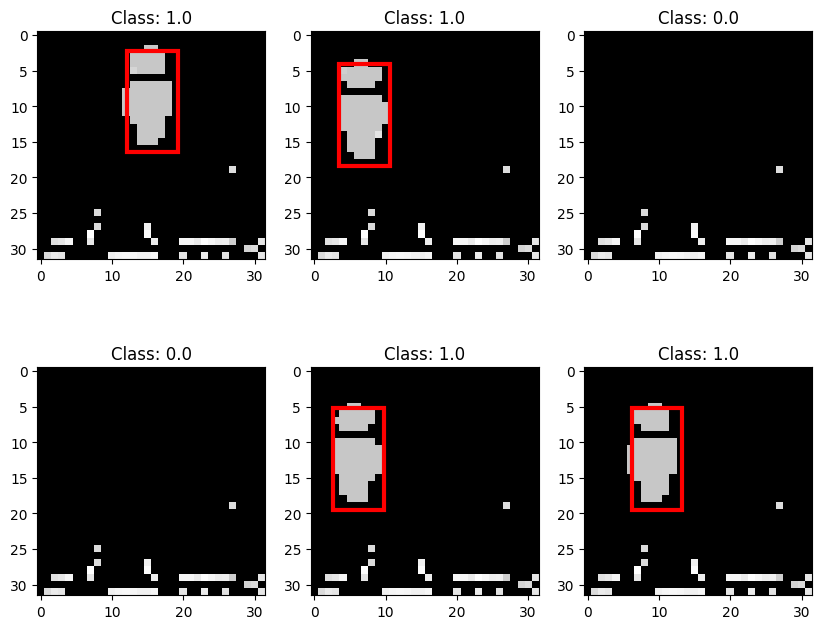

In [91]:
fig, ax = plt.subplots(2, 3, figsize=(10, 8))
images = np.random.choice(X_train.shape[0], 6)
for i in range(2):
    for j in range(3):
        rect = y_train[images[i * 3 + j]][1:]
        label = y_train[images[i * 3 + j]][0]
        print(rect)
        x, y, w, h = rect
        ax[i, j].add_patch(
            plt.Rectangle(
                (x * IMG_SIZE, y * IMG_SIZE),
                w * IMG_SIZE,
                h * IMG_SIZE,
                fill=False,
                edgecolor="red",
                lw=3,
            )
        )
        ax[i,j].set_title(f"Class: {label}")
        ax[i, j].imshow(X_train[images[i * 3 + j]], cmap="gray")

plt.show()


In [92]:
def build_model():
    # Define model layers.
    input_layer = Input(name= 'input' ,shape=(IMG_SIZE, IMG_SIZE, 1))
    first_dense = Conv2D(32, (6,6), activation='relu', name='conv1')(input_layer)
    flatten_layer = Flatten(name= 'flatten' )(first_dense)
    second_dense = Dense(units=8,activation='relu', name='relu1')(flatten_layer)
    y1_output = Dense(units=1, name='classification')(second_dense)
    y2_output = Dense(units=4,name='regression',activation='relu')(second_dense)
    model = Model(inputs=input_layer,outputs=[y1_output, y2_output])
    return model



In [93]:
model = build_model()
optimizer = Adam()
model.compile(optimizer=optimizer, loss={'classification': 'binary_crossentropy', 'regression': 'mse'})
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 conv1 (Conv2D)                 (None, 27, 27, 32)   1184        ['input[0][0]']                  
                                                                                                  
 flatten (Flatten)              (None, 23328)        0           ['conv1[0][0]']                  
                                                                                                  
 relu1 (Dense)                  (None, 8)            186632      ['flatten[0][0]']                
                                                                                            

In [99]:
#history = model.fit(X_train, y_train[:,1:], epochs=EPOCHS, batch_size=BATCH_SIZE)
history = model.fit(X_train, {'classification': y_train[:,0], 'regression': y_train[:,1:]}, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0025 - classification_loss: 0.0000e+00 - regression_loss: 0.0025
Epoch 2/100
12/12 [==============================] - 0s 25ms/step - loss: 0.0023 - classification_loss: 0.0000e+00 - regression_loss: 0.0023
Epoch 3/100
12/12 [==============================] - 0s 25ms/step - loss: 0.0022 - classification_loss: 0.0000e+00 - regression_loss: 0.0022
Epoch 4/100
12/12 [==============================] - 0s 25ms/step - loss: 0.0021 - classification_loss: 0.0000e+00 - regression_loss: 0.0021
Epoch 5/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0020 - classification_loss: 1.1003e-05 - regression_loss: 0.0020
Epoch 6/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0019 - classification_loss: 0.0000e+00 - regression_loss: 0.0019
Epoch 7/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0019 - classification_loss: 0.0000e+00 - regression_loss: 0.0019
Epoch 8/100
1

<AxesSubplot: >

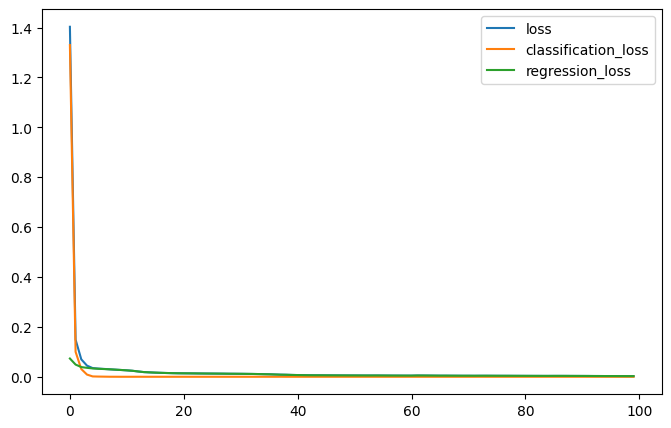

In [95]:
pd.DataFrame(history.history).plot(figsize=(8, 5))


In [96]:
model.predict(X_test[:1])[1][0]

1/1 [==============================] - 0s 138ms/step


array([0.        , 0.        , 0.01878421, 0.01437137], dtype=float32)

[0.78772825 0.10374495 0.23017408 0.46129587]
[0.         0.         0.00210644 0.00401763]
[0.85629463 0.272603   0.23806392 0.47692764]
[0.20694691 0.412415   0.25940287 0.51949066]
[0.02198499 0.35712674 0.22669762 0.45394325]
[0.64424354 0.04067793 0.21211222 0.4251306 ]


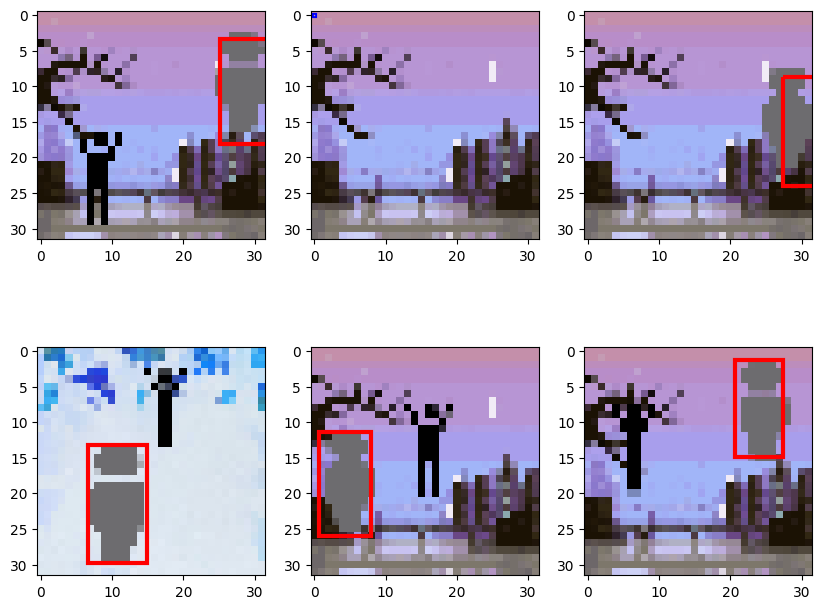

In [100]:
fig, ax = plt.subplots(2, 3, figsize=(10, 8))
imgs = np.random.choice(X_test.shape[0], 6)
for i in range(2):
    for j in range(3):
        index = np.random.randint(0, X_test.shape[0])
        rect = model.predict(X_test[index:index+1], verbose=0)[1][0]
        classification = model.predict(X_test[index:index+1], verbose=0)[0][0]
        print(rect)
        x, y, w, h = rect
        color = 'red' if classification > 0.5 else 'blue'
        ax[i, j].add_patch(
            plt.Rectangle(
                (x * IMG_SIZE, y * IMG_SIZE),
                w * IMG_SIZE,
                h * IMG_SIZE,
                fill=False,
                edgecolor=color,
                lw=3,
            )
            )
        # draw true rect 
        
        ax[i, j].imshow(test_images[index]/ 255)
plt.show()
